In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import OrderedDict
class ComsolOutputSorter():
    def __init__(self) -> None:
        pass
    
    def process_data_file(self) -> None:
        self.get_all_titles_and_title_indeces()
        self.count_all_eigenvalues()
        self.make_data_to_dict()
        self.make_dataframe_based_on_eigenvalues()

    def load_file(self, filename) -> None:
        with open(filename) as file:
            self.lines = file.readlines()

    def set_attributes(self, attributes: list = []) -> None:
        self.attributes = attributes

    def get_all_titles_and_title_indeces(self) -> None:
        titles = list()
        title_indeces = list()
        for index, line in enumerate(self.lines):
            if line[0] == '%':
                titles.append(line)
                title_indeces.append(index)

        self.titles = titles
        self.titles_indeces = title_indeces

    def count_all_eigenvalues(self):
        count = 0
        for line in self.lines:
            if 'lambda' in line and self.attributes[0] in line:
                count += 1
        self.count = count
        self.eigenvalues = range(1, count +1)

    def make_data_to_dict(self): # Had to be ugly because of the ugly structure of comsol outputs!
        dictionary = dict()
        for internal_index, index in enumerate(self.titles_indeces): # index of the lines
            if internal_index == len(self.titles_indeces) - 1:
                break
            this_title_index = self.titles_indeces[internal_index]
            next_title_index = self.titles_indeces[internal_index+1]
            dictionary[self.titles[internal_index]] = [float(line) for line in self.lines[this_title_index+1:next_title_index] if 'Data' in self.titles[internal_index]]
        last_line = len(self.lines)
        last_title = self.titles_indeces[-1] # the line number where last title is
        dictionary[self.lines[last_title]] = [float(x) for x in self.lines[last_title+1:last_line]]
        self.data_dict = dictionary
       
    def make_dataframe_based_on_eigenvalues(self) -> pd.DataFrame:
        df_list = []
        full_frame = pd.DataFrame()
        for eigenvalue in self.eigenvalues: # for all eigenvalues 
            dc = OrderedDict()
            for attribute in self.attributes:
                for title in self.data_dict.keys(): # we search all titles
                    if attribute in title and f'lambda={eigenvalue})' in title.split():
                            # row is lambda=eigenvalue
                            # column is attribute
                            dc[attribute] = str(self.data_dict[title])

            df = pd.DataFrame(data=dc, index=[eigenvalue])
            full_frame = pd.concat([full_frame, df])
            df_list.append(df)
        self.df_list = df_list
        self.data = full_frame

    def extract_feature(self, attribute: str, eigenvalue: int) -> list:
        return ast.literal_eval(self.data[attribute][eigenvalue])




# Now instead we set the thing up to make the cut lines, and then just ignore everything else.
    

[-1.0000000000000001e-07, -9.294131667134618e-08, -9.292187484708909e-08, -9.272144775906353e-08, -9.122033491741085e-08, -9.103540772345964e-08, -9.01660599718194e-08, -8.570213362024603e-08, -8.530750639094452e-08, -8.496381722947714e-08, -8.372797889704625e-08, -8.294945948779294e-08, -7.969752758297775e-08, -7.809102910542144e-08, -7.483360386224137e-08, -7.421708081138118e-08, -7.296772412791616e-08, -7.29148997283623e-08, -7.280090729528517e-08, -7.264020720457327e-08, -7.128051971484367e-08, -6.913778957686151e-08, -6.766648180303001e-08, -6.457616634675634e-08, -6.408180493724056e-08, -6.306268427778134e-08, -6.198333473675938e-08, -5.755780953170847e-08, -5.651212548893929e-08, -5.5387238510351116e-08, -5.0217390352075244e-08, -4.9744163351254115e-08, -4.9165279011200724e-08, -4.620166714451416e-08, -4.557744223155356e-08, -4.475320219992291e-08, -4.029944023113534e-08, -3.9950501848524084e-08, -3.502217724378078e-08, -3.4383910522548525e-08, -3.429401637531787e-08, -3.3852596

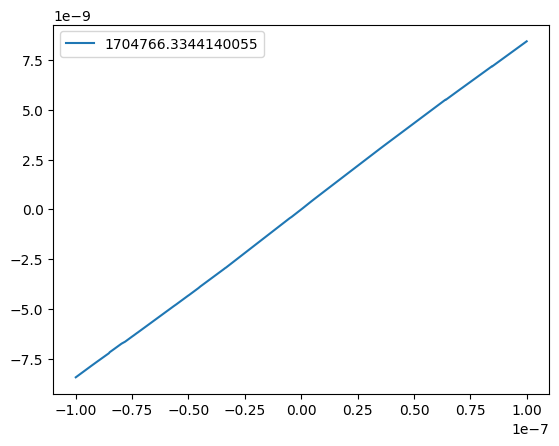

In [56]:
test = ComsolOutputSorter()
test.set_attributes(['freq', 'bottom-r_bottom' ,'solid.eZZ'])
test.load_file(filename='test.txt')
test.process_data_file()
#test.extract_feature('freq', 1)



#print(test.extract_feature('bottom-r_bottom', eigenvalue))
#print(test.extract_feature('solid.eZZ', eigenvalue))
#print(test.extract_feature('freq', eigenvalue)[0])

# for pr in test.data_dict.keys():
#     print(pr)
#     print(test.data_dict[pr])



[-1.0000000000000001e-07, -9.294131667134618e-08, -9.292187484708909e-08, -9.272144775906353e-08, -9.122033491741085e-08, -9.103540772345964e-08, -9.01660599718194e-08, -8.570213362024603e-08, -8.530750639094452e-08, -8.496381722947714e-08, -8.372797889704625e-08, -8.294945948779294e-08, -7.969752758297775e-08, -7.809102910542144e-08, -7.483360386224137e-08, -7.421708081138118e-08, -7.296772412791616e-08, -7.29148997283623e-08, -7.280090729528517e-08, -7.264020720457327e-08, -7.128051971484367e-08, -6.913778957686151e-08, -6.766648180303001e-08, -6.457616634675634e-08, -6.408180493724056e-08, -6.306268427778134e-08, -6.198333473675938e-08, -5.755780953170847e-08, -5.651212548893929e-08, -5.5387238510351116e-08, -5.0217390352075244e-08, -4.9744163351254115e-08, -4.9165279011200724e-08, -4.620166714451416e-08, -4.557744223155356e-08, -4.475320219992291e-08, -4.029944023113534e-08, -3.9950501848524084e-08, -3.502217724378078e-08, -3.4383910522548525e-08, -3.429401637531787e-08, -3.3852596

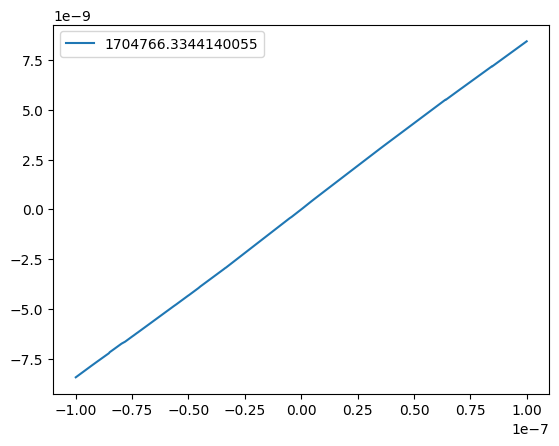

In [57]:
eigenvalue = 2
plt.plot(test.extract_feature('bottom-r_bottom', eigenvalue), test.extract_feature('solid.eZZ', eigenvalue), '-', label = test.extract_feature('freq', eigenvalue)[0])
plt.legend()
print(test.extract_feature('bottom-r_bottom', eigenvalue))
print(test.extract_feature('solid.eZZ', eigenvalue))
#flex mode

In [50]:
# d = pd.read_csv("test.csv", delimiter='|')
# d['freq (Hz) @ lambda=98']
#Easier method, saving for another time lol

[-1.0000000000000001e-07, -9.294131667134618e-08, -9.292187484708909e-08, -9.272144775906353e-08, -9.122033491741085e-08, -9.103540772345964e-08, -9.01660599718194e-08, -8.570213362024603e-08, -8.530750639094452e-08, -8.496381722947714e-08, -8.372797889704625e-08, -8.294945948779294e-08, -7.969752758297775e-08, -7.809102910542144e-08, -7.483360386224137e-08, -7.421708081138118e-08, -7.296772412791616e-08, -7.29148997283623e-08, -7.280090729528517e-08, -7.264020720457327e-08, -7.128051971484367e-08, -6.913778957686151e-08, -6.766648180303001e-08, -6.457616634675634e-08, -6.408180493724056e-08, -6.306268427778134e-08, -6.198333473675938e-08, -5.755780953170847e-08, -5.651212548893929e-08, -5.5387238510351116e-08, -5.0217390352075244e-08, -4.9744163351254115e-08, -4.9165279011200724e-08, -4.620166714451416e-08, -4.557744223155356e-08, -4.475320219992291e-08, -4.029944023113534e-08, -3.9950501848524084e-08, -3.502217724378078e-08, -3.4383910522548525e-08, -3.429401637531787e-08, -3.3852596

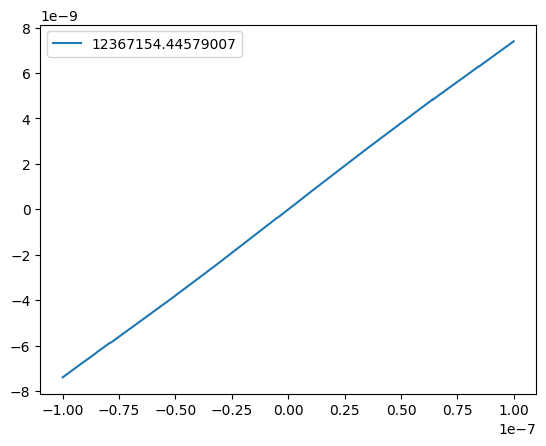

In [62]:
eigenvalue = 8
plt.plot(test.extract_feature('bottom-r_bottom', eigenvalue), test.extract_feature('solid.eZZ', eigenvalue), '-', label = test.extract_feature('freq', eigenvalue)[0])
plt.legend()
print(test.extract_feature('bottom-r_bottom', eigenvalue))
print(test.extract_feature('solid.eZZ', eigenvalue))

[-1.0000000000000001e-07, -9.294131667134618e-08, -9.292187484708909e-08, -9.272144775906353e-08, -9.122033491741085e-08, -9.103540772345964e-08, -9.01660599718194e-08, -8.570213362024603e-08, -8.530750639094452e-08, -8.496381722947714e-08, -8.372797889704625e-08, -8.294945948779294e-08, -7.969752758297775e-08, -7.809102910542144e-08, -7.483360386224137e-08, -7.421708081138118e-08, -7.296772412791616e-08, -7.29148997283623e-08, -7.280090729528517e-08, -7.264020720457327e-08, -7.128051971484367e-08, -6.913778957686151e-08, -6.766648180303001e-08, -6.457616634675634e-08, -6.408180493724056e-08, -6.306268427778134e-08, -6.198333473675938e-08, -5.755780953170847e-08, -5.651212548893929e-08, -5.5387238510351116e-08, -5.0217390352075244e-08, -4.9744163351254115e-08, -4.9165279011200724e-08, -4.620166714451416e-08, -4.557744223155356e-08, -4.475320219992291e-08, -4.029944023113534e-08, -3.9950501848524084e-08, -3.502217724378078e-08, -3.4383910522548525e-08, -3.429401637531787e-08, -3.3852596

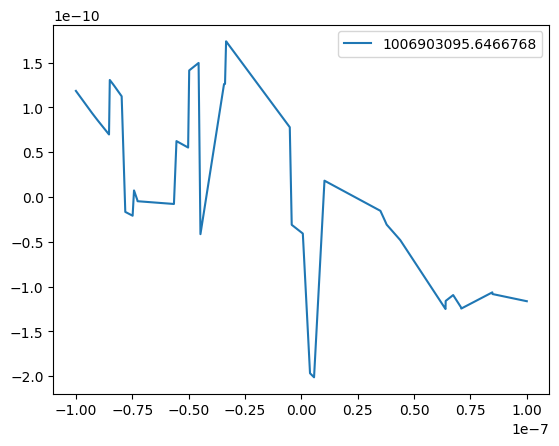

In [63]:
eigenvalue = 99

plt.plot(test.extract_feature('bottom-r_bottom', eigenvalue), test.extract_feature('solid.eZZ', eigenvalue), '-', label = test.extract_feature('freq', eigenvalue)[0])
plt.legend()
print(test.extract_feature('bottom-r_bottom', eigenvalue))
print(test.extract_feature('solid.eZZ', eigenvalue))
# Torsional



[-1.0000000000000001e-07, -9.294131667134618e-08, -9.292187484708909e-08, -9.272144775906353e-08, -9.122033491741085e-08, -9.103540772345964e-08, -9.01660599718194e-08, -8.570213362024603e-08, -8.530750639094452e-08, -8.496381722947714e-08, -8.372797889704625e-08, -8.294945948779294e-08, -7.969752758297775e-08, -7.809102910542144e-08, -7.483360386224137e-08, -7.421708081138118e-08, -7.296772412791616e-08, -7.29148997283623e-08, -7.280090729528517e-08, -7.264020720457327e-08, -7.128051971484367e-08, -6.913778957686151e-08, -6.766648180303001e-08, -6.457616634675634e-08, -6.408180493724056e-08, -6.306268427778134e-08, -6.198333473675938e-08, -5.755780953170847e-08, -5.651212548893929e-08, -5.5387238510351116e-08, -5.0217390352075244e-08, -4.9744163351254115e-08, -4.9165279011200724e-08, -4.620166714451416e-08, -4.557744223155356e-08, -4.475320219992291e-08, -4.029944023113534e-08, -3.9950501848524084e-08, -3.502217724378078e-08, -3.4383910522548525e-08, -3.429401637531787e-08, -3.3852596

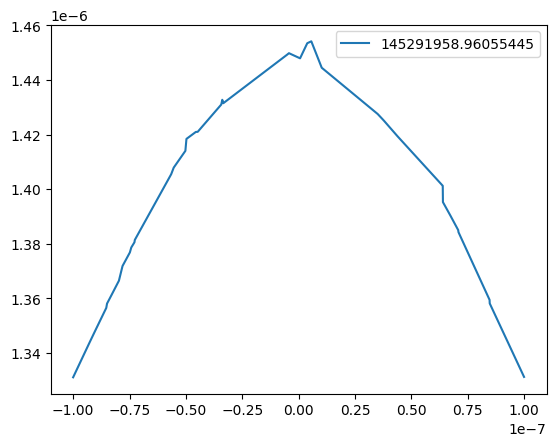

In [74]:
eigenvalue = 32

plt.plot(test.extract_feature('bottom-r_bottom', eigenvalue), test.extract_feature('solid.eZZ', eigenvalue), '-', label = test.extract_feature('freq', eigenvalue)[0])
plt.legend()
print(test.extract_feature('bottom-r_bottom', eigenvalue))
print(test.extract_feature('solid.eZZ', eigenvalue))
# longitudinal



mode 32 is only positive, have the frequency 145291958.96055445
mode 46 is only negative, have the frequency 292625801.6114682
mode 61 is only positive, have the frequency 442413765.79684615
mode 71 is only negative, have the frequency 593752477.4098647
mode 82 is only positive, have the frequency 745379261.7055985
mode 93 is only negative, have the frequency 896245195.3292658
Note that plot of magnitude agrees with method of postive, negative values.


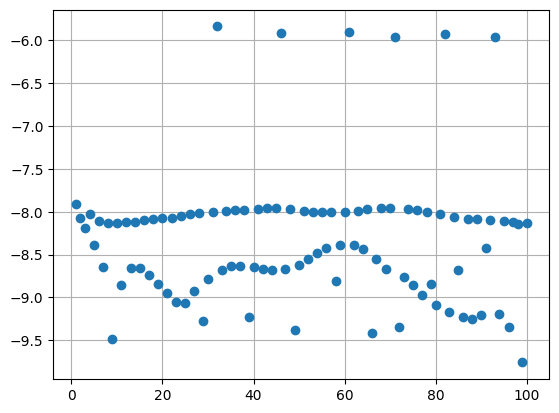

In [86]:
from scipy.stats import skewtest
from math import log10
class ModeClassifier():
    def __init__(self, comsolsorted_data: ComsolOutputSorter) -> None:
        self.data = comsolsorted_data
    
    def classify_all_modes(self):
        for mode in self.data.eigenvalues:
            if self.is_all_data_positive(modenumber=mode, attribute='solid.eZZ'):
                print(f'mode {mode} is only positive, have the frequency {self.data.extract_feature(attribute="freq", eigenvalue=mode)[0]}')

            if self.is_all_data_negative(modenumber=mode, attribute='solid.eZZ'):
                print(f'mode {mode} is only negative, have the frequency {self.data.extract_feature(attribute="freq", eigenvalue=mode)[0]}')


    def classify_mode(self, modenumber):
        pass

    def is_all_data_positive(self, modenumber, attribute): #vague indication of symmetry
        data_quantity = self.data.extract_feature(attribute=attribute, eigenvalue=modenumber)
        for data_point in data_quantity:
            if data_point < 0:
                return False
        return True


    def is_all_data_negative(self, modenumber, attribute): #vague indication of symmetry
        data_quantity = self.data.extract_feature(attribute=attribute, eigenvalue=modenumber)
        for data_point in data_quantity:
            if data_point > 0:
                return False
        return True
        pass

    def plot_order_of_magnitude(self) -> bool:
        maxvals = []
        for mode in self.data.eigenvalues:
            maxval = log10(abs(max(self.data.extract_feature(attribute="solid.eZZ", eigenvalue=mode))))
            maxvals.append(maxval)
        
        plt.plot(self.data.eigenvalues, maxvals, 'o')
        plt.grid()

    def is_data_symmetric(self, midpoint = 0, num_error_allowed = 5/100, mode = None) -> bool:
        pass
        axis_0 = self.data.extract_feature(attribute='bottom-r_bottom', eigenvalue=mode)
        axis_1 = self.data.extract_feature(attribute="solid.eZZ", eigenvalue=mode)

        #data before middle
        axis_1[axis_0 < 0] 

        #data after middle
        axis_1[axis_0 > 0] 
    
    def is_data_antisymmetric(self, midpoint = 0, num_error_allowed = 5/100) -> bool:
        pass
    
    def plot_mode(self):
        pass

    def is_data_to_crumply(self):
        pass

    def remove_degenerate_modes(self):
        pass

    def get_list_of_flexural_modes(self):
        pass

    def get_list_of_longitudinal_modes(self):
        pass
        
    def get_list_of_torsional_modes(self):
        pass

classi = ModeClassifier(test)
classi.classify_all_modes()
#classi.plot_order_of_magnitude()
print("Note that plot of magnitude agrees with method of postive, negative values.")
# So it is easy enough to peel out the 
#above -10 seems to be longitdudinal
# -8 seems to be flexural 
# lower seems to be torsional




In [27]:
list99 = [1.183629677656678E-10,
1.301627147425848E-10,
1.200836799330473E-10,
1.1232314225957E-10,
-2.092776765964677E-11,
-3.040670640973942E-12,
-7.825729952578683E-12,
1.4120871045526492E-10,
-5.451219669139101E-12,
1.4953761801842353E-10,
1.2598009392077758E-10,
1.2614806980973472E-10,
1.0544819663938306E-10,
8.209051681268693E-11,
-3.1063282118865765E-11,
-4.617348723393117E-12,
-1.5471804553584492E-11,
-2.0123689962799624E-10,
-3.066646300294093E-11,
-3.085602962700222E-11,
-1.967028222405883E-10,
-4.080931067938413E-11,
-1.2502013599586805E-10,
-1.0946113407695588E-10,
-1.2413037313776925E-10,
-1.2453062152253702E-10,
-1.2431377245739892E-10,
-1.0831579790039744E-10,
-1.1633059238958163E-10]
#hand taken
list99_ext = test.extract_feature('solid.eZZ', 99)
assert list99_ext == list99

In [33]:
pos_hand =[-1.0000000000000001E-7,
-8.484517961934517E-8,
-8.185293992835126E-8,
-7.969752758297733E-8,
-7.483360386224138E-8,
-7.280090729528517E-8,
-5.651212548893935E-8,
-4.9744163351254115E-8,
-6.89508596578466E-8,
-4.5577442231553324E-8,
-3.429401637531775E-8,
-3.3852596586013004E-8,
-3.5576193029949814E-8,
-6.3918005802730605E-9,
-4.2727094587053104E-9,
2.7063070700835204E-8,
3.5065180948749965E-8,
5.6379114512029585E-9,
3.7807447943853534E-8,
3.784094579561516E-8,
3.843048096549228E-9,
6.545427063373811E-10,
6.39405246815143E-8,
6.733634884865226E-8,
6.370831696441048E-8,
7.092553333497998E-8,
7.109068320857248E-8,
8.47767466831985E-8,
9.999999999999998E-8]
pos_ext = test.extract_feature('bottom-r_bottom', 99)
print(pos_hand == pos_ext)
# for index, el in enumerate(pos_hand):
#     print((pos_hand[index], pos_ext[index]))
print(len(pos_hand))
print(len(pos_ext))

True
(-1.0000000000000001e-07, -1.0000000000000001e-07)
(-8.484517961934517e-08, -8.484517961934517e-08)
(-8.185293992835126e-08, -8.185293992835126e-08)
(-7.969752758297733e-08, -7.969752758297733e-08)
(-7.483360386224138e-08, -7.483360386224138e-08)
(-7.280090729528517e-08, -7.280090729528517e-08)
(-5.651212548893935e-08, -5.651212548893935e-08)
(-4.9744163351254115e-08, -4.9744163351254115e-08)
(-6.89508596578466e-08, -6.89508596578466e-08)
(-4.5577442231553324e-08, -4.5577442231553324e-08)
(-3.429401637531775e-08, -3.429401637531775e-08)
(-3.3852596586013004e-08, -3.3852596586013004e-08)
(-3.5576193029949814e-08, -3.5576193029949814e-08)
(-6.3918005802730605e-09, -6.3918005802730605e-09)
(-4.2727094587053104e-09, -4.2727094587053104e-09)
(2.7063070700835204e-08, 2.7063070700835204e-08)
(3.5065180948749965e-08, 3.5065180948749965e-08)
(5.6379114512029585e-09, 5.6379114512029585e-09)
(3.7807447943853534e-08, 3.7807447943853534e-08)
(3.784094579561516e-08, 3.784094579561516e-08)
(3.84